In [1]:
#This project is using Kaggle Competitions to perform machine learning techniques on the Titanic dataset

In [62]:
#Getting all of the libraries imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
from sklearn.model_selection import train_test_split
init_notebook_mode(connected=True)
cf.go_offline()
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
#Creating a training DataFrame from a CSV file
train = pd.read_csv('titanic_train.csv')

In [6]:
#Checking out the data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


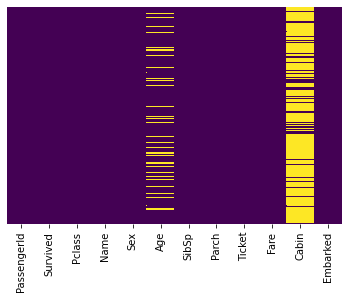

In [7]:
#Using Seaborn to make a heatmap to check out missing data --> Yellow means that the data is null
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

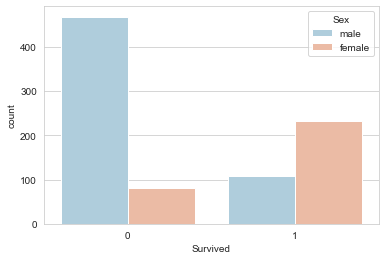

In [13]:
#More exploratory data analysis to see how many people survived based on Sex
sns.countplot(x='Survived',data=train,hue='Sex',palette='RdBu_r')

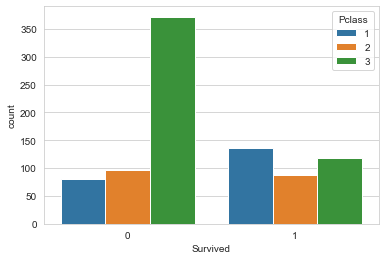

In [15]:
#More exploratory data analysis to see how many people survived based on their ticket
sns.countplot(x='Survived',data=train,hue='Pclass')

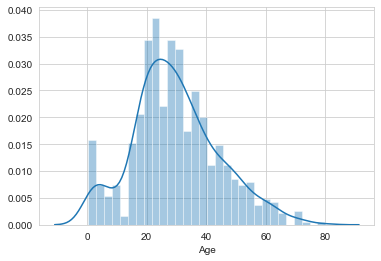

In [16]:
#Seeing the age distribution of who survived
sns.distplot(train['Age'].dropna(),bins=30)

In [17]:
#Looking into the train dataset more
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


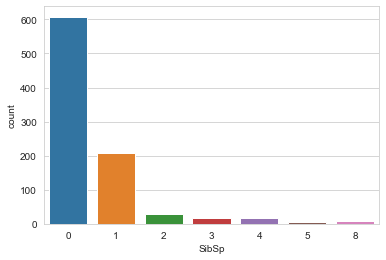

In [19]:
#Looking at the passengers to see if they had children or spouses on board
sns.countplot(x='SibSp',data=train)

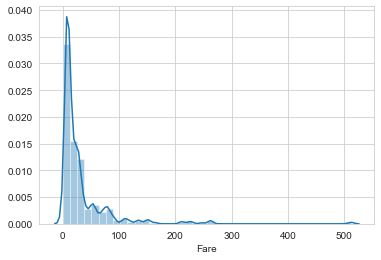

In [27]:
#Looking at the fare ticket prices
sns.distplot(train['Fare'].dropna(),bins=40)

In [31]:
#Creating an interactive histogram using cufflinks and iplot
train['Fare'].iplot(kind='hist',bins=50)

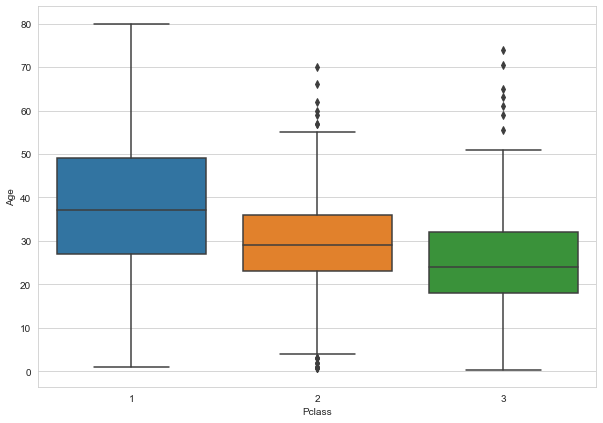

In [34]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [36]:
#Creating a function that will fill the null age values with the average age based on each class
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [39]:
#Using that function in the existing Age column to fill in nulls
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

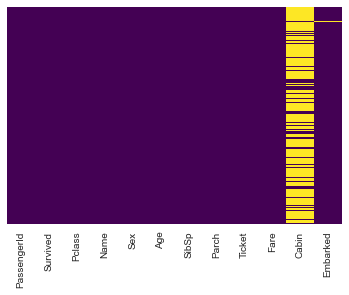

In [41]:
#Re-checking the heatmap to see if the Age column has changed --> It has
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [42]:
#Dropping the "Cabin" column
train.drop('Cabin',axis=1,inplace=True)

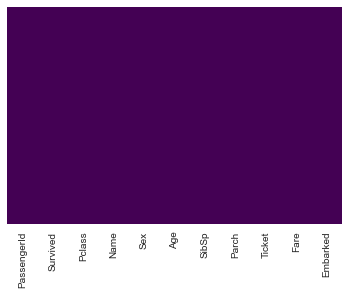

In [44]:
#Dropping any other null values in the dataframe and checking for missing values using heatmap
train.dropna(inplace=True)
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [48]:
#Taking categorical fields into numeric data for machine learning, also called a dummy variable and making a new DataFrame
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [49]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [50]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [52]:
#Concatenating the new dateframes into the existing one and setting axis = 1 to make sure they are columns
train = pd.concat([train,sex,embark],axis=1)

In [53]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [58]:
#Dropping columns we won't use in machine learning 
train.drop(['PassengerId'],axis=1,inplace=True)

In [59]:
#Checking DataFrame to see if it is ready
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [60]:
# Splitting data into X and y DataFramse to be used as inputs and outputs
X = train.drop('Survived',axis=1)
y= train['Survived']

In [63]:
#Getting the input and output into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [64]:
#Importing the machine learning model 
from sklearn.linear_model import LogisticRegression

In [65]:
#Instanciating the model
logmodel = LogisticRegression()

In [66]:
#Training the model
logmodel.fit(X_train, y_train)

C:\Users\mattl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [68]:
#Predict with unseen data using the trained model
predictions = logmodel.predict(X_test)

In [70]:
from sklearn.metrics import classification_report

In [71]:
#Printing classification report to show performance of model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267

